# Analyse vom App-Markt
**Final Project**

**Team:** Emir Hamulic, Emrehan Imamoglu, Markus Tuma  
**Datum:** 2025-04-20

Dieses Notebook demonstriert das Einlesen und Verarbeiten der beiden geforderten Datensätze aus dem Apple App Store und Google Play Store.

## Imports und MongoDB-Verbindung

Zuerst installieren wir erforderliche Bibliotheken und stellen die Verbindung zur MongoDB her.

In [1]:
# Installiere erforderliche Bibliotheken (falls nicht vorhanden)
# !pip install pandas pymongo matplotlib wordcloud

from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# MongoDB-Verbindung
client = MongoClient("mongodb://localhost:27017/")
db = client['app_market']
raw_coll = db['raw_apps']
clean_coll = db['clean_apps']
mr_coll = db['mr_genre_avg_rating']
print("MongoDB-Verbindung hergestellt.")

MongoDB-Verbindung hergestellt.


## 1. Einlesen des Apple App Store Datensatzes

In [2]:
# Einlesen des CSV in ein DataFrame
apple_df = pd.read_csv('datasource/appleAppData.csv')

# Schema anzeigen und erste Zeilen
print("Apple App Store DataFrame Schema:")
print(apple_df.dtypes)
apple_df.head()

Apple App Store DataFrame Schema:
App_Id                      object
App_Name                    object
AppStore_Url                object
Primary_Genre               object
Content_Rating              object
Size_Bytes                 float64
Required_IOS_Version        object
Released                    object
Updated                     object
Version                     object
Price                      float64
Currency                    object
Free                          bool
DeveloperId                  int64
Developer                   object
Developer_Url               object
Developer_Website           object
Average_User_Rating        float64
Reviews                      int64
Current_Version_Score      float64
Current_Version_Reviews      int64
dtype: object


,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


## 2. Einlesen des Google Play Store Datensatzes

In [3]:
# Einlesen des CSV in ein DataFrame
google_df = pd.read_csv('datasource/Google-Playstore.csv')

# Schema anzeigen und erste Zeilen
print("Google Play Store DataFrame Schema:")
print(google_df.dtypes)
google_df.head()

Google Play Store DataFrame Schema:
App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## 3. Speicherung der Rohdaten in MongoDB

In [5]:
# Rohdaten in MongoDB einfügen
raw_coll.delete_many({})  # bestehende Rohdaten löschen, falls vorhanden
raw_coll.insert_many(apple_df.to_dict('records'))
raw_coll.insert_many(google_df.to_dict('records'))
print(f'Rohdaten: {raw_coll.count_documents({})} Dokumente in raw_apps.')

Rohdaten: 3543320 Dokumente in raw_apps.


## 4. Datenaufbereitung (Clean-Up)

In [4]:
# === 1. Kopieren, Plattform kennzeichnen und Spalten umbenennen ===
apple_df_clean = apple_df.copy()
google_df_clean = google_df.copy()
apple_df_clean['platform'] = 'iOS'
google_df_clean['platform'] = 'Android'

apple_df_clean.rename(columns={
    'App_Name': 'app_name',
    'Primary_Genre': 'category',
    'Average_User_Rating': 'rating',
    'Reviews': 'num_reviews',
    'Price': 'price',
    'Free': 'free',
    'Released': 'released',
    'Updated': 'updated'
}, inplace=True)

google_df_clean.rename(columns={
    'App Name': 'app_name',
    'Category': 'category',
    'Rating': 'rating',
    'Rating Count': 'num_reviews',
    'Price': 'price',
    'Free': 'free',
    'Released': 'released',
    'Last Updated': 'updated'
}, inplace=True)

# === 2. Datetime konvertieren ===
apple_df_clean['released'] = pd.to_datetime(apple_df_clean['released'])
apple_df_clean['updated']  = pd.to_datetime(apple_df_clean['updated'])
google_df_clean['released'] = pd.to_datetime(google_df_clean['released'])
google_df_clean['updated']  = pd.to_datetime(google_df_clean['updated'])

# === 3. Relevante Spalten auswählen und mergen ===
cols = ['app_name', 'category', 'rating', 'num_reviews', 'price', 'free',
        'platform', 'released', 'updated']
apple_sub  = apple_df_clean[cols]
google_sub = google_df_clean[cols]

combined_df = pd.concat([apple_sub, google_sub], ignore_index=True)
combined_df.drop_duplicates(subset=['app_name', 'platform'], inplace=True)

print("relevante Spalten und Verbindung")

# === 4. Sampling: 50 % der Datensätze, Top 10 Review-Apps immer dabei ===
total = len(combined_df)
target = total // 2

# Top 10 Apps nach num_reviews (plattform‑übergreifend)
top10 = combined_df.nlargest(10, 'num_reviews')

# Restliche Zeilen ohne die Top10
rest = combined_df.drop(top10.index)

# Zufallsstichprobe aus „rest“, um insgesamt target Zeilen zu bekommen
rest_sample = rest.sample(n=target - len(top10), random_state=42)

print("Stichproben ermittelt")

# Finaler Datensatz
sampled_df = pd.concat([top10, rest_sample], ignore_index=True)
print(f"Verwendete Datensätze: {len(sampled_df)} von {total} ({len(sampled_df)/total:.0%})")

# === 5. Konvertierungs-Helper & Insert in MongoDB ===
def to_native(val):
    if isinstance(val, np.integer):
        return int(val)
    if isinstance(val, np.floating):
        return float(val)
    if pd.api.types.is_datetime64_any_dtype(type(val)):
        return pd.to_datetime(val).to_pydatetime()
    return val

# NaN → None
df_native = sampled_df.where(pd.notnull(sampled_df), None)
print("Nans entfernt")

relevante Spalten und Verbindung
Stichproben ermittelt
Verwendete Datensätze: 1700727 von 3401455 (50%)
Nans entfernt


### Records verarbeiten

In [5]:
# Records auf native Typen konvertieren
records = [
    {k: to_native(v) for k, v in rec.items()}
    for rec in df_native.to_dict('records')
]
print("Records fertig")

Records fertig


### Speicherung in die MongoDB

In [6]:
# In MongoDB speichern
clean_coll.delete_many({})
clean_coll.insert_many(records)
print(f"In MongoDB gespeichert: {clean_coll.count_documents({})} Dokumente")

In MongoDB gespeichert: 1700727 Dokumente


## 5. MapReduce: Durchschnittliche Bewertung pro Kategorie

In [ ]:
# MapReduce-Funktionen definieren
map_func = '''
function() {
    emit(this.category, {count: 1, total: this.rating});
}
'''
reduce_func = '''
function(key, values) {
    var result = {count: 0, total: 0};
    values.forEach(function(v) {
        result.count += v.count;
        result.total += v.total;
    });
    return result;
}
'''
finalize_func = '''
function(key, reduced) {
    reduced.avg_rating = reduced.total / reduced.count;
    return reduced;
}
'''

# MapReduce ausführen
db.clean_apps.map_reduce(map_func, reduce_func, "mr_genre_avg_rating", finalize=finalize_func)
print("MapReduce abgeschlossen.")

# Python MapReduce Function


## 6. Visualisierung der Ergebnisse

In [7]:
from functools import reduce

def map_reduce(data, map_func, reduce_func):
    # Map-Schritt
    mapped = []
    for item in data:
        mapped.extend(map_func(item))
    # Shuffle & Group
    grouped = {}
    for key, value in mapped:
        grouped.setdefault(key, []).append(value)
    # Reduce-Schritt
    return {key: reduce_func(key, values) for key, values in grouped.items()}

### Use Case 1: Durchschnittliche Bewertung pro Kategorie

Apps mit Reviews: 1698099 von 3401455 insgesamt


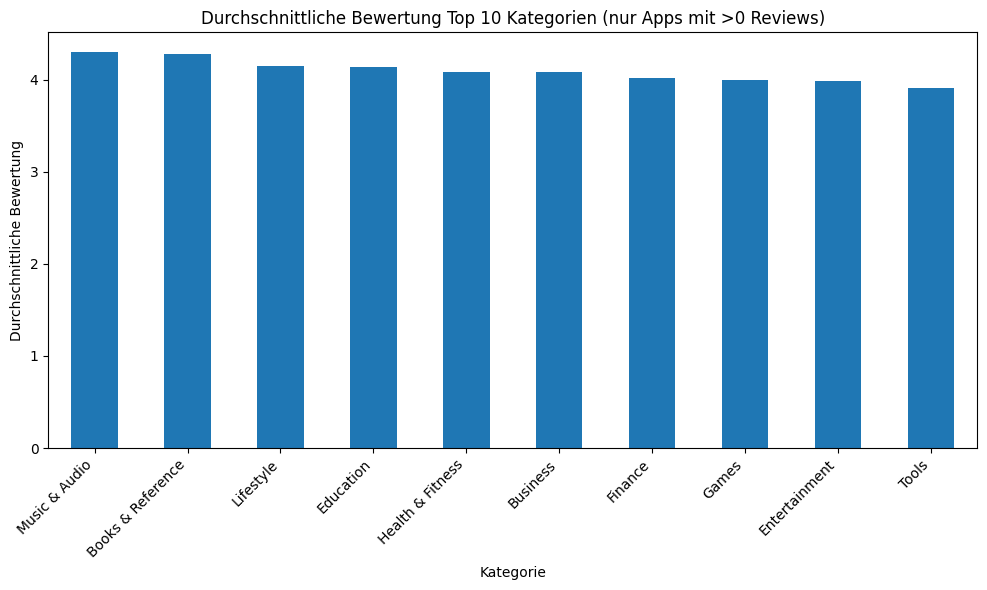

In [11]:
# 0. Sicherstellen: rating ist float, num_reviews ist int
combined_df['rating']      = pd.to_numeric(combined_df['rating'],      errors='coerce')
combined_df['num_reviews'] = pd.to_numeric(combined_df['num_reviews'], errors='coerce').fillna(0).astype(int)

# 1. Alle Apps ohne Reviews rauswerfen
df_rated = combined_df[combined_df['num_reviews'] > 0].copy()
print(f"Apps mit Reviews: {len(df_rated)} von {len(combined_df)} insgesamt")

# 2. Map‑ und Reduce‑Funktionen
def map_category(doc):
    return [(doc['category'], {'count': 1, 'total': doc['rating']})]

def reduce_category(key, values):
    result = {'count': 0, 'total': 0}
    for v in values:
        result['count'] += v['count']
        result['total'] += v['total']
    result['avg'] = result['total'] / result['count'] if result['count'] else 0
    return result

# 3. Anwenden auf den gefilterten DataFrame
stats_cat = map_reduce(df_rated.to_dict('records'), map_category, reduce_category)

# 4. In DataFrame umwandeln und sortieren
df_cat = pd.DataFrame([
    {'category': k, 'count': v['count'], 'avg_rating': v['avg']}
    for k, v in stats_cat.items()
]).sort_values('avg_rating', ascending=False)

# 4.1 Kategorien reduzieren: nur Top 10 nach Anzahl Apps
top_cats = df_cat.nlargest(10, 'count')['category'].tolist()
df_cat_top10 = df_cat[df_cat['category'].isin(top_cats)]

# 5. Plot der Top 10 Kategorien
plt.figure(figsize=(10,6))
df_cat_top10.set_index('category')['avg_rating'].plot(kind='bar')
plt.title('Durchschnittliche Bewertung Top 10 Kategorien (nur Apps mit >0 Reviews)')
plt.xlabel('Kategorie')
plt.ylabel('Durchschnittliche Bewertung')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Use Case 2: Trend durchschnittliche Bewertung über Zeit

Apps mit Reviews: 1698099 von 3401455 insgesamt
Platforms nach Dropna: platform
iOS    543787
Name: count, dtype: int64
Trend‑Spalten: ['iOS']
Monatliche Werte je Plattform:
 platform
iOS    157
dtype: int64


/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_56175/373886814.py:31: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ts['month'] = df_ts['ts'].dt.to_period('M')


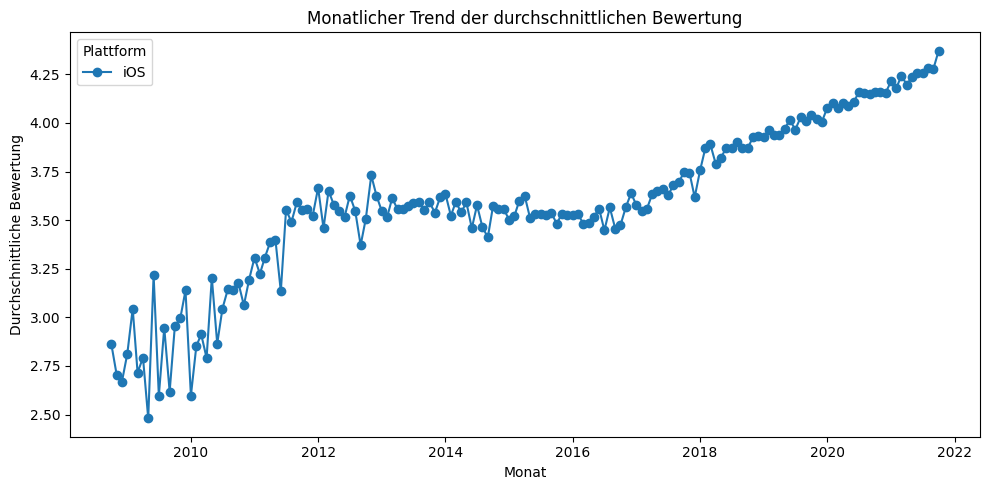

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Voraussetzung: combined_df mit Spalten
# ['app_name','category','rating','num_reviews','price','free','platform','released','updated']

# 1) Datentypen korrigieren
combined_df['rating']      = pd.to_numeric(combined_df['rating'],      errors='coerce')
combined_df['num_reviews'] = pd.to_numeric(combined_df['num_reviews'], errors='coerce').fillna(0).astype(int)

# 2) Nur Apps mit mindestens einer Review
df = combined_df[combined_df['num_reviews'] > 0].copy()

# 3) Timestamps parsen
df['updated']  = pd.to_datetime(df['updated'],  errors='coerce')
df['released'] = pd.to_datetime(df['released'], errors='coerce')

# 4) Einheitlicher Zeitstempel: updated falls vorhanden, sonst released
df['ts'] = df['updated'].fillna(df['released'])

# 5) Ungültige Zeitstempel herausfiltern
df = df.dropna(subset=['ts'])

# 6) Monatsspalte erzeugen (Period M)
df['month'] = df['ts'].dt.to_period('M')

# 7) Durchschnitt je (Monat, Plattform) berechnen
trend = (
    df
    .groupby(['month','platform'])['rating']
    .mean()
    .unstack('platform')
)

# 8) PeriodIndex in Timestamp umwandeln
trend.index = trend.index.to_timestamp()

# 9) Plotten
plt.figure(figsize=(10,5))
for plat in trend.columns:
    plt.plot(trend.index, trend[plat], marker='o', label=plat)

plt.title('Monatlicher Trend der durchschnittlichen Bewertung (Python-only)')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Bewertung')
plt.legend(title='Plattform')
plt.tight_layout()
plt.show()


 ### Top 10 Apps nach Anzahl Reviews

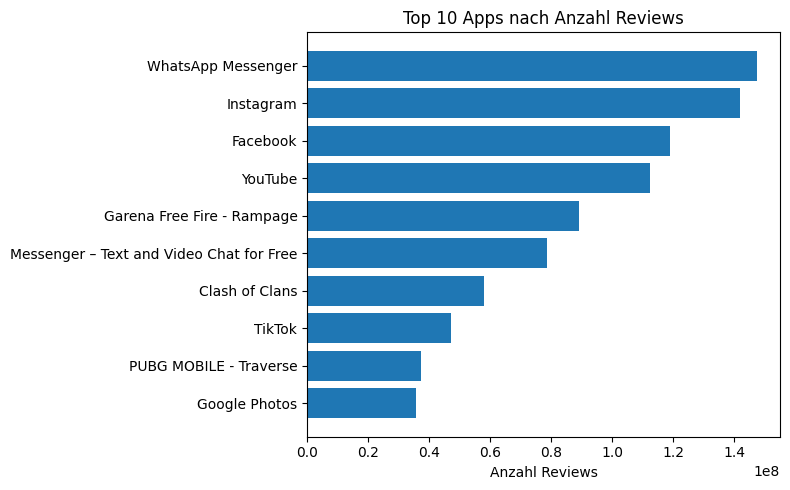

In [14]:
# Summe der Reviews pro App (plattform‑übergreifend oder getrennt)
top10_apps = (
    combined_df
    .groupby('app_name')['num_reviews']
    .sum()
    .nlargest(10)
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.barh(top10_apps['app_name'][::-1], top10_apps['num_reviews'][::-1])
plt.title('Top 10 Apps nach Anzahl Reviews')
plt.xlabel('Anzahl Reviews')
plt.tight_layout()
plt.show()

### Für getrennte Platformen

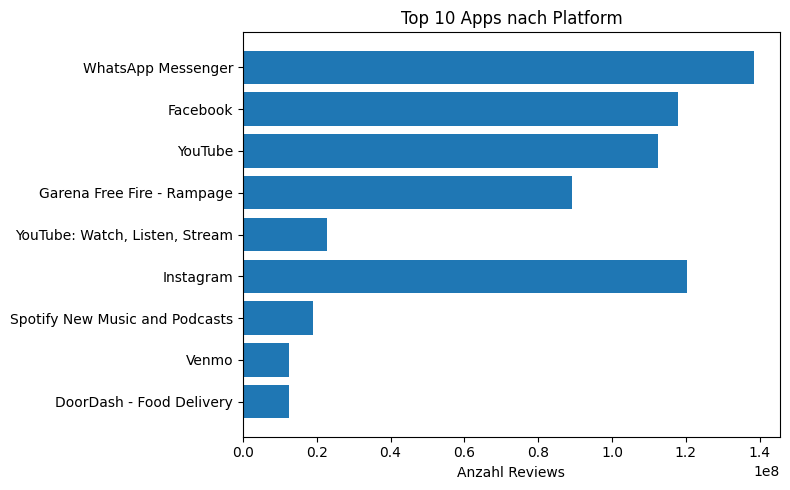

In [15]:
top10_by_platform = (
    combined_df
    .groupby(['platform','app_name'])['num_reviews']
    .sum()
    .reset_index()
    .sort_values(['platform','num_reviews'], ascending=[True, False])
    .groupby('platform')
    .head(5)
)
plt.figure(figsize=(8,5))
plt.barh(top10_by_platform['app_name'][::-1], top10_by_platform['num_reviews'][::-1])
plt.title('Top 10 Apps nach Platform')
plt.xlabel('Anzahl Reviews')
plt.tight_layout()
plt.show()

## 7. Wortwolke der App-Namen

In [ ]:
# Wortwolke aus App-Namen erzeugen
text = " ".join(combined_df['app_name'].astype(str))
wc = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 8. Big Data Kriterien & Infrastruktur
- **Volume:** Kombination großer CSVs
- **Velocity:** regelmäßige Neu-Scrapes oder API-Abfragen
- **Variety:** iOS vs. Android Daten
- **Veracity:** Bereinigung durch Duplikat-Entfernung
- **Value:** Insights zu Benutzerzufriedenheit

**Infrastruktur:** MongoDB in Docker, Postman/Git multiuser-fähig.